# 모델 훈련 

## 4.1 선형 회귀

### 4.1.1 정규방정식

In [3]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [4]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.91626335],
       [3.09414819]])

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.91626335],
       [10.10455973]])

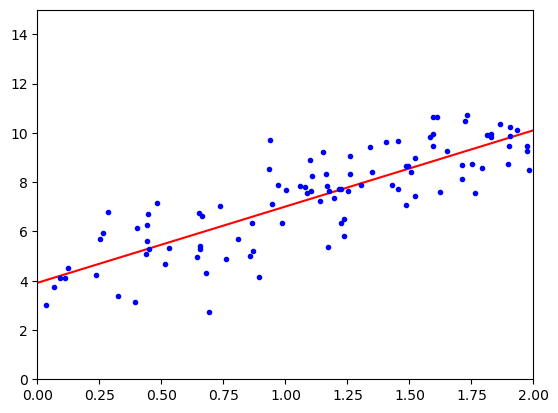

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.91626335] [[3.09414819]]
[[ 3.91626335]
 [10.10455973]]


In [9]:
# LinearRegression 클래스의 기반이 되는 scipy.linag.lstsq() 함수
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_best_svd

array([[3.91626335],
       [3.09414819]])

In [10]:
# 유사역행렬 (무어-펜로즈 역행렬)
np.linalg.pinv(X_b).dot(y)

array([[3.91626335],
       [3.09414819]])

### 4.1.2 계산 복잡도

## 4.2 경사 하강법

### 4.2.1. 배치 경사 하강법

In [11]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.91626335],
       [3.09414819]])

### 4.2.2. 확률적 경사 하강법
- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 샘플에 대한 그레디언트를 계산  
- 시작할 때 학습률을 크게 하고 점차 작게 줄여서 전역 최솟값에 도달하게 함   

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

# 학습 스케줄: 매 반복에서 학습률을 결정
# (SGDRegressor에서 learning_rate='invscaling' 참고)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.90654843]), array([3.24050091]))

### 4.2.3 미니배치 경사 하강법
- 임의의 작은 샘플 세트(미니 배치)에 대한 그레디언트를 계산  
- 배치 경사 하강법과 확률적 경사 하강법 사이  
- 적절한 학습 스케줄 사용  

## 4.3 다항 회귀

In [16]:
# 약간의 노이즈를 포함한 비선형(2차 방정식) 데이터 생성
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

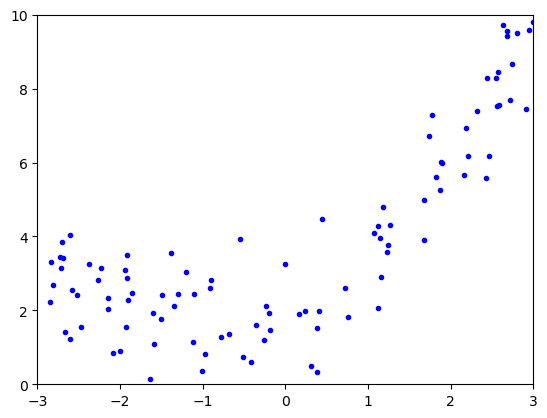

In [17]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0],X_poly[0])

[-1.27736212] [-1.27736212  1.631654  ]


In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93971196]), array([[1.01238866, 0.52564246]]))

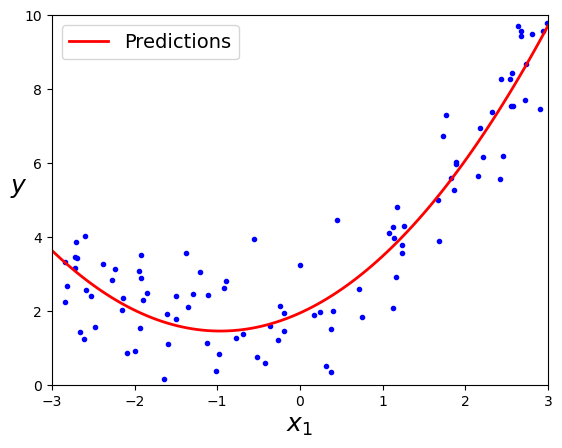

In [20]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 4.4 학습 곡선

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val , y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

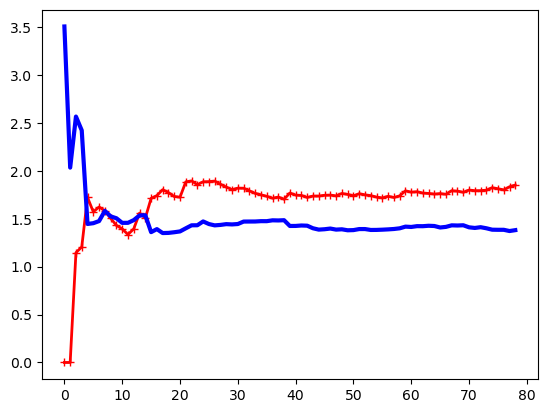

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

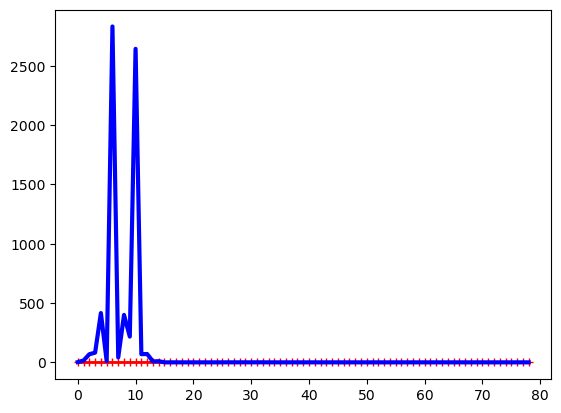

In [23]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

- 모델의 일반화 오차 = 편향 + 분산 + 줄일 수 없는 오차(내재된 오차)  
- 편향과 분산은 트레이드 오프 관계  

## 4.5 규제가 있는 선형 모델
- 규제: 과대적합을 감소시키는 좋은 방법  
- 다항 회귀에선 다항식의 차수를 감소, 선형 회귀에선 모델의 가중치를 제한  
- 릿지 회귀, 라쏘 회귀, 엘라스틱넷  

### 4.5.1 릿지 회귀
- 규제 강도를 증가시킬수록 모델의 분산은 줄고 편향은 커짐  

In [24]:
from sklearn.linear_model import Ridge

# 정규방정식을 사용한 릿지 회귀(feat. 숄레스키 분해)
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.43177818]])

In [25]:
# 확률적 경사 하강법
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.43415198])

### 4.5.2 라쏘 회귀
- 자동으로 특성 선택을 하고 희소 모델을 만듦  

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.39365477])

### 4.5.3 엘라스틱넷

In [27]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.39272221])

### 4.5.4 조기 종료

In [33]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size=0.5, random_state=10
)

In [34]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0= 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [35]:
minimum_val_error, best_epoch, best_model

(1.2975921308167657,
 237,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=None, warm_start=True))

## 4.6 로지스틱 회귀
- 분류에 사용할 수 있는 회귀 알고리즘  

### 4.6.1 확률 추정
- 결과(예측)값의 로지스틱을 출력  

### 4.6.2 훈련과 비용 함수
- 로지스틱 회귀의 비용 함수의 최솟값을 계산하는 알려진 해는 없음  
- 그러나 볼록함수 이므로 경사하강법과 같은 최적화 알고리즘이 전역 최솟값을 찾는 것을 보장  

### 4.6.3 결정 경계

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:,3:]
y = (iris['target'] == 2).astype(int)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

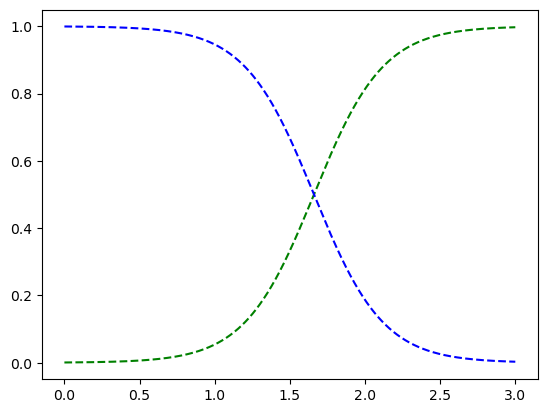

In [39]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

In [40]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀
- 멀티 클래스 분류기  
- 각 클래스에 대한 추정 확률 연산  

In [41]:
X = iris["data"][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [44]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.21626375e-07 5.73689803e-02 9.42630398e-01]]


## 4.7 연습문제

### 1. 수백만 개의 특성을 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용할 수 있을까요?

### 2. 훈련 세트에 있는 특성들이 각기 아주 다른 스케일을 가지고 있습니다. 이런 데이터에 잘 작동하지 않는 알고리즘은 무엇일까요? 그 이유는 무엇일까요? 이 문제를 어떻게 해결할 수 있을까요?

### 3. 경사 하강법으로 로지스틱 회귀 모델을 훈련시킬 때 지역 최솟값에 갇힐 가능성이 있을까요?

### 4. 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들어낼까요?

### 5. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타내봤습니다. 검증 오 차가 일정하게 상승되고 있다면 어떤 일이 일어나고 있는 걸까요? 이 문제를 어떻게 해결할 수 있나요?

### 6. 검증 오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는 것이 좋은 방법인가요?

### 7. (우리가 언급한 것 중에서) 어떤 경사 하강법 알고리즘이 가장 빠르게 최적 솔루션의 주변에 도달할까요? 실제로 수렴하는 것은 어떤 것인가요? 다른 방법들도 수렴하게 만들 수 있나요?

### 8. 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 큽니다. 무슨 일이 생긴 걸까요? 이 문제를 해결하는 세 가지 방법은 무엇인가요?

### 9. 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높았습니다. 이 모델에는 높은 편향이 문제인가요, 아니면 높은 분산이 문제인가요? 규제 하이퍼파라미터 알파를 증가시켜야 할까요, 아니면 줄여야 할까요?

### 10. 다음과 같이 사용해야 하는 이유는?
- 평범한 선형 회귀(즉, 아무런 규제가 없는 모델) 대신 릿지 회귀
- 릿지 회귀 대신 라쏘 회귀
- 라쏘 회귀 대신 엘라스틱넷

### 11. 사진을 낮과 밤, 실내와 실외로 분류하려 합니다. 두 개의 로지스틱 회귀 분류기를 만들어야 할까요, 아니면 하나의 소프트맥스 회귀 분류기를 만들어야 할까요?

### 12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해보세요 (사이킷런은 사용하지 마세요)